In [159]:
# Pseudo code for the text classification task
import os

import pandas as pd

import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/adamerik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamerik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
def txt_to_list(folder_path):
    temp_list = []
    txt_files = os.listdir(folder_path)
    for txt_file in txt_files:
        with open(os.path.join(folder_path, txt_file), 'r', encoding='utf-8') as file:
            text_data = file.read()
            temp_list.append(text_data)
    return temp_list


def preprocess_text(text):
    # Tokenize the text (you can replace this with your tokenizer)
    tokens = nltk.word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    nltk_stopwords = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in nltk_stopwords]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Remove special characters and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    # Remove empty tokens
    tokens = [token for token in tokens if token != '']

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [142]:
### Data load

## Train data load
banks_train_folder_path = "./train/banks"
oilgas_train_folder_path = "./train/oilgas"
pharma_train_folder_path = "./train/pharma"

banks_train_df = pd.DataFrame(txt_to_list(banks_train_folder_path))
oilgas_train_df = pd.DataFrame(txt_to_list(oilgas_train_folder_path))
pharma_train_df = pd.DataFrame(txt_to_list(pharma_train_folder_path))

banks_train_df["class"] = "banks"
oilgas_train_df["class"] = "oilgas"
pharma_train_df["class"] = "pharma"

train_df = pd.concat([banks_train_df, oilgas_train_df, pharma_train_df])
train_df = train_df.rename(columns={0: "text", 1: "class",})

## Validation data load
banks_validation_folder_path = "./validation/banks"
oilgas_validation_folder_path = "./validation/oilgas"
pharma_validation_folder_path = "./validation/pharma"

banks_validation_df = pd.DataFrame(txt_to_list(banks_validation_folder_path))
oilgas_validation_df = pd.DataFrame(txt_to_list(oilgas_validation_folder_path))
pharma_validation_df = pd.DataFrame(txt_to_list(pharma_validation_folder_path))

banks_validation_df["class"] = "banks"
oilgas_validation_df["class"] = "oilgas"
pharma_validation_df["class"] = "pharma"

validation_df = pd.concat([banks_validation_df, oilgas_validation_df, pharma_validation_df])
validation_df = train_df.rename(columns={0: "text", 1: "class",})


## Test data load
test_df = pd.DataFrame(txt_to_list("./test"))
test_df["class"] = ""
test_df = test_df.rename(columns={0: "text", 1: "class",})

In [143]:
# train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
# print(train_df[train_df['class']=="banks"]['word_count'].mean()) #banks text
# print(train_df[train_df['class']=="oilgas"]['word_count'].mean()) #oilgas text
# print(train_df[train_df['class']=="pharma"]['word_count'].mean()) #pharma text

In [144]:
train_df['text'] = train_df['text'].apply(preprocess_text)
validation_df['text'] = validation_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

In [152]:
X_train = train_df["text"]
Y_train = train_df["class"]

X_validation = validation_df["text"]
Y_validation = validation_df["class"]

In [153]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # X_train is the list of preprocessed text in the training set

# Transform the validation data
X_validation_tfidf = tfidf_vectorizer.transform(X_validation)  # X_test is the list of preprocessed text in the validation set

In [154]:
# Initialize the classifier
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train_tfidf, Y_train)  # y_train is the list of class labels in the training set

LogisticRegression()

In [155]:
# Make predictions on the testing data
y_pred = classifier.predict(X_validation_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_validation, y_pred)
report = classification_report(Y_validation, y_pred)
confusion = confusion_matrix(Y_validation, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9895833333333334
Classification Report:
               precision    recall  f1-score   support

       banks       1.00      1.00      1.00        34
      oilgas       1.00      0.96      0.98        28
      pharma       0.97      1.00      0.99        34

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96

Confusion Matrix:
 [[34  0  0]
 [ 0 27  1]
 [ 0  0 34]]


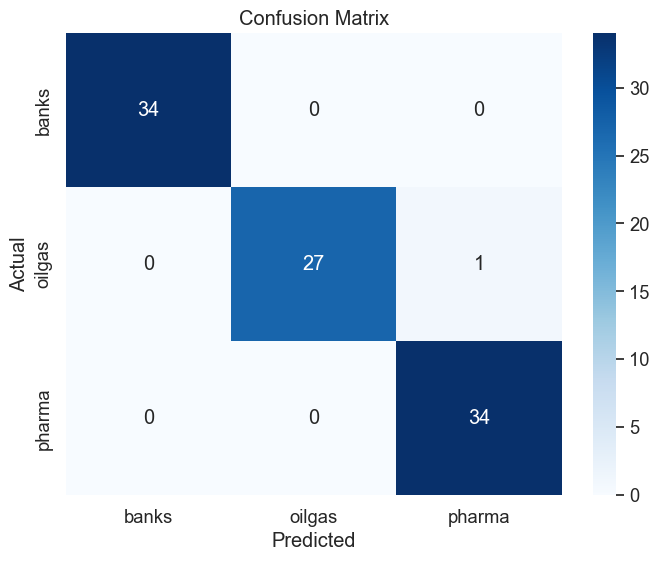

In [160]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["banks", "oilgas", "pharma"], yticklabels=["banks", "oilgas", "pharma"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [161]:
X_test = test_df["text"]
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_test_pred = classifier.predict(X_test_tfidf)

In [163]:
test_df["class"] = y_test_pred

In [164]:
test_df

,text,class
0,unit state secur exchang commiss washington dc...,banks
1,unit state secur exchang commiss washington dc...,oilgas
2,tabl content unit state secur exchang commiss ...,oilgas
3,secur exchang commiss washington d c form k fi...,banks
4,unit state secur exchang commiss washington dc...,pharma
5,unit state secur exchang commiss washington dc...,pharma
6,unit state secur exchang commiss washington dc...,banks
7,unit state secur exchang commiss washington dc...,pharma
8,unit state secur exchang commiss washington dc...,oilgas
9,use link rapidli review document tabl content ...,oilgas
